In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

import warnings


warnings.filterwarnings('ignore')

# Görselleştirme ayarları
%matplotlib inline
sns.set(style="whitegrid")

print("Tüm kütüphaneler yüklendi.")

Tüm kütüphaneler yüklendi.


In [4]:
#DOSYA YOLLARI YÜKLEME KISMI
path_flights = r'/Users/oguzhanozdemir/Desktop/veri/dataSet/flights.csv'
path_airports = r'/Users/oguzhanozdemir/Desktop/veri/dataSet/airports.csv'
path_airlines = r'/Users/oguzhanozdemir/Desktop/veri/dataSet/airlines.csv'


In [5]:
def load_data(path_flights, path_airports, path_airlines):
   
    try:
        df_flights = pd.read_csv(path_flights, low_memory=False)
        print(f"Flights tablosu yüklendi. Boyut: {df_flights.shape}")
        
        df_airports = pd.read_csv(path_airports)
        print(f"Airports tablosu yüklendi. Boyut: {df_airports.shape}")
        
        df_airlines = pd.read_csv(path_airlines)
        print(f"Airlines tablosu yüklendi. Boyut: {df_airlines.shape}")
        
        return df_flights, df_airports, df_airlines
    
    except FileNotFoundError as e:
        print(f"Dosya bulunamadı. ({e})")
        return None, None, None
    except Exception as e:
        print(f"Hata oluştu. ({e})")
        return None, None, None

print("load_data fonksiyonu tanımlandı.")

load_data fonksiyonu tanımlandı.


In [6]:
try: 
    df_flights = pd.read_csv(path_flights, low_memory=False)
    print(f"Flights tablosunun boyutu : {df_flights.shape}")
    df_airports = pd.read_csv(path_airports)
    print(f"Airports tablosunun boyutu : {df_airports.shape}")
    df_airlines = pd.read_csv(path_airlines)
    print(f"Airlines tablosunun boyutu : {df_airlines.shape}")

except FileNotFoundError as e:
    print(f"Dosya bulunamadı. ({e})")

except Exception as e : 
    print(f"Hata oluştu. ({e})")

Flights tablosunun boyutu : (5819079, 31)
Airports tablosunun boyutu : (322, 7)
Airlines tablosunun boyutu : (14, 2)


# airports veri analizi

In [7]:
df_airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IATA_CODE  322 non-null    object 
 1   AIRPORT    322 non-null    object 
 2   CITY       322 non-null    object 
 3   STATE      322 non-null    object 
 4   COUNTRY    322 non-null    object 
 5   LATITUDE   319 non-null    float64
 6   LONGITUDE  319 non-null    float64
dtypes: float64(2), object(5)
memory usage: 17.7+ KB


In [8]:
df_airports.describe()

,LATITUDE,LONGITUDE
count,319.000000,319.000000
mean,38.981244,-98.378964
std,8.616736,21.523492
min,13.483450,-176.646030
25%,33.652040,-110.839385
50%,39.297610,-93.403070
75%,43.154675,-82.722995
max,71.285450,-64.798560


In [9]:
print("her sütunda bulunan toplam null değer sayısı")
df_airports.isnull().sum()

her sütunda bulunan toplam null değer sayısı


IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
COUNTRY      0
LATITUDE     3
LONGITUDE    3
dtype: int64

In [10]:
print("her sütunda bulunan unique değerlerin toplam sayısı")
df_airports.nunique()

her sütunda bulunan unique değerlerin toplam sayısı


IATA_CODE    322
AIRPORT      322
CITY         308
STATE         54
COUNTRY        1
LATITUDE     319
LONGITUDE    319
dtype: int64

In [11]:
print("Airports tablosunun ilk 5 satırı: ")
df_airports.head(5)

Airports tablosunun ilk 5 satırı: 


,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [12]:
print("Airports tablosunun son 5 satırı ")
df_airports.tail(5)

Airports tablosunun son 5 satırı 


,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023
321,YUM,Yuma International Airport,Yuma,AZ,USA,32.65658,-114.60597


# airlines veri analizi


In [13]:
df_airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   IATA_CODE  14 non-null     object
 1   AIRLINE    14 non-null     object
dtypes: object(2)
memory usage: 356.0+ bytes


In [14]:
df_airlines.describe()

,IATA_CODE,AIRLINE
count,14,14
unique,14,14
top,UA,United Air Lines Inc.
freq,1,1


In [15]:
print("her sütunda bulunan toplam null değer sayısı")
df_airlines.isnull().sum()

her sütunda bulunan toplam null değer sayısı


IATA_CODE    0
AIRLINE      0
dtype: int64

In [16]:
print("her sütunda bulunan unique değerlerin toplam sayısı")
df_airlines.nunique()

her sütunda bulunan unique değerlerin toplam sayısı


IATA_CODE    14
AIRLINE      14
dtype: int64

In [17]:
print("Airlines tablosunun ilk 5 satırı ")
df_airlines.head(5)

Airlines tablosunun ilk 5 satırı 


,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [18]:
print("Airlines tablosunun son 5 satırı: ")
df_airlines.tail(5)

Airlines tablosunun son 5 satırı: 


,IATA_CODE,AIRLINE
9,DL,Delta Air Lines Inc.
10,EV,Atlantic Southeast Airlines
11,HA,Hawaiian Airlines Inc.
12,MQ,American Eagle Airlines Inc.
13,VX,Virgin America


# flights veri analizi

In [19]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [20]:
df_flights.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5819079.0,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.732926e+06,5.732926e+06,5.730032e+06,5.730032e+06,...,5.819079e+06,5.726566e+06,5.714008e+06,5.819079e+06,5.819079e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06
mean,2015.0,6.524085e+00,1.570459e+01,3.926941e+00,2.173093e+03,1.329602e+03,1.335204e+03,9.370158e+00,1.607166e+01,1.357171e+03,...,1.493808e+03,1.476491e+03,4.407057e+00,2.609863e-03,1.544643e-02,1.348057e+01,7.615387e-02,1.896955e+01,2.347284e+01,2.915290e+00
std,0.0,3.405137e+00,8.783425e+00,1.988845e+00,1.757064e+03,4.837518e+02,4.964233e+02,3.708094e+01,8.895574e+00,4.980094e+02,...,5.071647e+02,5.263197e+02,3.927130e+01,5.102012e-02,1.233201e-01,2.800368e+01,2.143460e+00,4.816164e+01,4.319702e+01,2.043334e+01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,7.300000e+02,9.170000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,...,1.110000e+03,1.059000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,1.690000e+03,1.325000e+03,1.330000e+03,-2.000000e+00,1.400000e+01,1.343000e+03,...,1.520000e+03,1.512000e+03,-5.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,3.230000e+03,1.730000e+03,1.740000e+03,7.000000e+00,1.900000e+01,1.754000e+03,...,1.918000e+03,1.917000e+03,8.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,1.900000e+01,2.900000e+01,0.000000e+00
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.855000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,...,2.400000e+03,2.400000e+03,1.971000e+03,1.000000e+00,1.000000e+00,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03


In [21]:
print("her sütunda bulunan toplam null değer sayısı")
df_flights.isnull().sum()

her sütunda bulunan toplam null değer sayısı


YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

In [22]:
print("her sütunda bulunan unique değerlerin toplam sayısı")
df_flights.nunique()

her sütunda bulunan unique değerlerin toplam sayısı


YEAR                      1
MONTH                    12
DAY                      31
DAY_OF_WEEK               7
AIRLINE                  14
FLIGHT_NUMBER          6952
TAIL_NUMBER            4897
ORIGIN_AIRPORT          628
DESTINATION_AIRPORT     629
SCHEDULED_DEPARTURE    1321
DEPARTURE_TIME         1440
DEPARTURE_DELAY        1217
TAXI_OUT                184
WHEELS_OFF             1440
SCHEDULED_TIME          550
ELAPSED_TIME            712
AIR_TIME                675
DISTANCE               1363
WHEELS_ON              1440
TAXI_IN                 185
SCHEDULED_ARRIVAL      1435
ARRIVAL_TIME           1440
ARRIVAL_DELAY          1240
DIVERTED                  2
CANCELLED                 2
CANCELLATION_REASON       4
AIR_SYSTEM_DELAY        570
SECURITY_DELAY          154
AIRLINE_DELAY          1067
LATE_AIRCRAFT_DELAY     695
WEATHER_DELAY           632
dtype: int64

In [23]:
print("Flights tablosunun ilk 5 satırı ")
df_flights.head(5)

Flights tablosunun ilk 5 satırı 


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
print("Flights tablosunun son 5 satırı: ")
df_flights.tail(5)

Flights tablosunun son 5 satırı: 


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819078,2015,12,31,4,B6,839,N534JB,JFK,BQN,2359,...,442.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
def preprocess_pipeline(df_flights_split, df_airlines_full, df_airports_full):
  
    #TABLO BİRLEŞTİRME İŞLEMLERİ
  
    df = pd.merge(df_flights_split, df_airlines_full, left_on='AIRLINE', right_on='IATA_CODE', how='left')
    df.drop('IATA_CODE', axis=1, inplace=True)
    df = pd.merge(df, df_airports_full.add_suffix('_ORIGIN'), left_on='ORIGIN_AIRPORT', right_on='IATA_CODE_ORIGIN', how='left')
    df.drop(['IATA_CODE_ORIGIN'], axis=1, inplace=True)
    df = pd.merge(df, df_airports_full.add_suffix('_DEST'), left_on='DESTINATION_AIRPORT', right_on='IATA_CODE_DEST', how='left')
    df.drop(['IATA_CODE_DEST'], axis=1, inplace=True)

    # FAZLA NULL DEĞERLER BARINDIRAN SÜTUNLARIN SİLİNMESİ
    high_null_cols = ['CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
    df.drop(columns=high_null_cols, inplace=True)

    #İptal edilen uçuşlar ve yönlendirilen uçuşların kaldırılması.
    
    df = df[(df['CANCELLED'] == 0) & (df['DIVERTED'] == 0)].copy()
    df.drop(columns=['CANCELLED', 'DIVERTED'], inplace=True)

    #Amerika'da uçuşlar 15 dakikadan fazla gecikme olduğu zaman uçuş gecikmiş sayıldığı için 'IS_DELAYED' değişkeni oluşturup bunun üzerinden kontrol edeceğiz.
    df['IS_DELAYED'] = (df['ARRIVAL_DELAY'] > 15).astype(int)

    # veri setindeki 'SCHEDULED_DEPARTURE' kısmında saatler normal yazılmamıştır örn: 5,10,15 gibi . Bunu gece sabah öğle akşam ve gece yarısı olarak günün bölümlerine ayırıyoruz.
    df['SCHEDULED_HOUR'] = df['SCHEDULED_DEPARTURE'].astype(str).str.zfill(4).str[:2].astype(int)
    bins = [-1, 5, 11, 16, 20, 23]
    labels = ['Gece (00-05)', 'Sabah (06-11)', 'Öğle (12-16)', 'Akşam (17-20)', 'Gece Yarısı (21-23)']
    df['TIME_OF_DAY'] = pd.cut(df['SCHEDULED_HOUR'], bins=bins, labels=labels, ordered=False)

    silinecek_sutunlar = [
          #sızıntı yapanlar
        'DEPARTURE_TIME',
        'DEPARTURE_DELAY',
        'TAXI_OUT',
        'WHEELS_OFF',
        'ELAPSED_TIME',
        'AIR_TIME',
        'WHEELS_ON',
        'TAXI_IN',
        'ARRIVAL_TIME',
        'ARRIVAL_DELAY',

        #gereksizler hepsi aynı değer
        'YEAR',
        'COUNTRY_ORIGIN',
        'COUNTRY_DEST',
        
        #gürültüye sebebiyet verenler
        'TAIL_NUMBER',        
        'FLIGHT_NUMBER',

        #eklenen zenginleştirmeler
        'AIRLINE_NAME',
        'AIRPORT_ORIGIN',
        'CITY_ORIGIN',
        'STATE_ORIGIN',
        'LATITUDE_ORIGIN',
        'LONGITUDE_ORIGIN',
        'AIRPORT_DEST',
        'CITY_DEST',
        'STATE_DEST',
        'LATITUDE_DEST',
        'LONGITUDE_DEST',


        #gereksiz değişkenler
        'SCHEDULED_DEPARTURE', 
        'SCHEDULED_HOUR', 
        'SCHEDULED_ARRIVAL'
    ]
    df.drop(columns=silinecek_sutunlar, inplace=True)
    
    df.dropna(inplace=True)

    return df

print("preprocess_pipeline fonksiyonu tanımlandı.")

preprocess_pipeline fonksiyonu tanımlandı.


In [26]:
def encode_features(X_train, X_test, y_train):

   #Target encoding yapıyoruz. Yanı havalimanı kodları yerine ortalama gecikme oranı yazılıyor. One hot encoding yapmaya kalksak çok havalimanı kodu olduğundan çok fazla sütun çıkardı o yüzden target encoding en mantıklısı.
    
    target_encode_cols = ['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']
    ohe_cols = ['AIRLINE', 'TIME_OF_DAY']

    # veri sızıntısını önleme
    train_data_temp = X_train.copy()
    train_data_temp['IS_DELAYED'] = y_train

    for col in target_encode_cols:
        mapping = train_data_temp.groupby(col)['IS_DELAYED'].mean()
        X_train[col + '_ENCODED'] = X_train[col].map(mapping)
        X_test[col + '_ENCODED'] = X_test[col].map(mapping)
        global_mean = y_train.mean()
        X_train[col + '_ENCODED'].fillna(global_mean, inplace=True)
        X_test[col + '_ENCODED'].fillna(global_mean, inplace=True)
        
    # ohe 
    X_train = pd.get_dummies(X_train, columns=ohe_cols, prefix=ohe_cols, dtype=int)
    X_test = pd.get_dummies(X_test, columns=ohe_cols, prefix=ohe_cols, dtype=int)

    # sütun hizalama
    train_cols = X_train.columns
    X_test = X_test.reindex(columns=train_cols, fill_value=0)

    # eski sütunları silme
    X_train.drop(columns=target_encode_cols, inplace=True)
    X_test.drop(columns=target_encode_cols, inplace=True)
    
    print("Encoding işlemleri tamamlandı.")
    return X_train, X_test

print("encode_features fonksiyonu tanımlandı.")

encode_features fonksiyonu tanımlandı.


In [27]:
#DOSYA YOLLARI YÜKLEME KISMI
path_flights = r'/Users/oguzhanozdemir/Desktop/veri/dataSet/flights.csv'
path_airports = r'/Users/oguzhanozdemir/Desktop/veri/dataSet/airports.csv'
path_airlines = r'/Users/oguzhanozdemir/Desktop/veri/dataSet/airlines.csv'


#veri yükleme
df_flights, df_airports, df_airlines = load_data(path_flights, path_airports, path_airlines)

if df_flights is not None:
    
    #veriyi test ve train olarak bölme
    
    flights_train, flights_test = train_test_split(df_flights, test_size=0.2, random_state=42)
    print(f"Flights Train boyutu: {flights_train.shape}")
    print(f"Flights Test boyutu: {flights_test.shape}")
    

    df_airlines.rename(columns={'AIRLINE': 'AIRLINE_NAME'}, inplace=True)
    
    print("\nEğitim verisi için proses pipeline fonksiyonu çağırılıyor ")
    train_df = preprocess_pipeline(flights_train, df_airlines, df_airports)
    
    print("Test verisi için proses pipeline fonksiyonu çağırılıyor")
    test_df = preprocess_pipeline(flights_test, df_airlines, df_airports)
    

    print(f"Train Veri Boyutu: {train_df.shape}")
    print(f"Test Veri Boyutu: {test_df.shape}")

else:
    print("Veri yüklenemedi, işlemler durduruldu.")

Flights tablosu yüklendi. Boyut: (5819079, 31)
Airports tablosu yüklendi. Boyut: (322, 7)
Airlines tablosu yüklendi. Boyut: (14, 2)
Flights Train boyutu: (4655263, 31)
Flights Test boyutu: (1163816, 31)

Eğitim verisi için proses pipeline fonksiyonu çağırılıyor 
Test verisi için proses pipeline fonksiyonu çağırılıyor
Train Veri Boyutu: (4571137, 10)
Test Veri Boyutu: (1142871, 10)


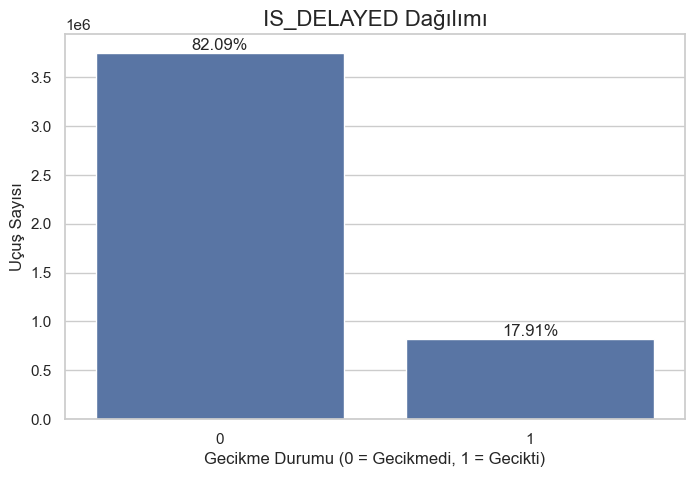


Sayısal Değişkenlerin Dağılımı ('DISTANCE','SCHEDULED_TIME'):


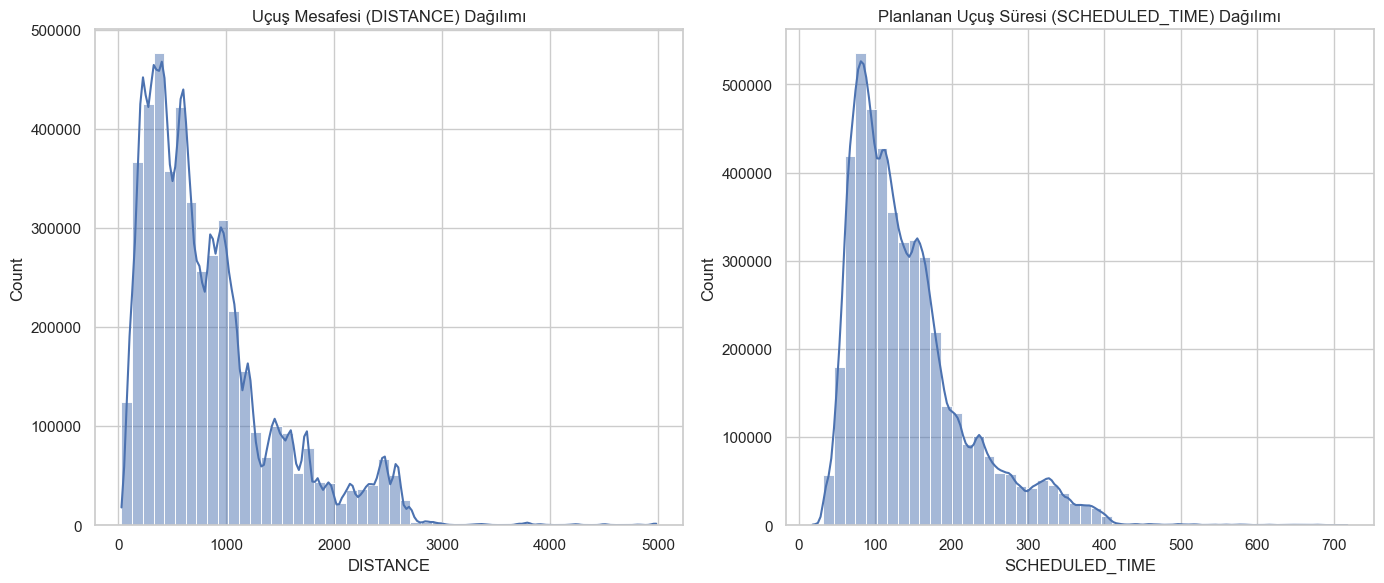


Sayısal Değişkenler ve Hedef Değişken Arasındaki Korelasyon:


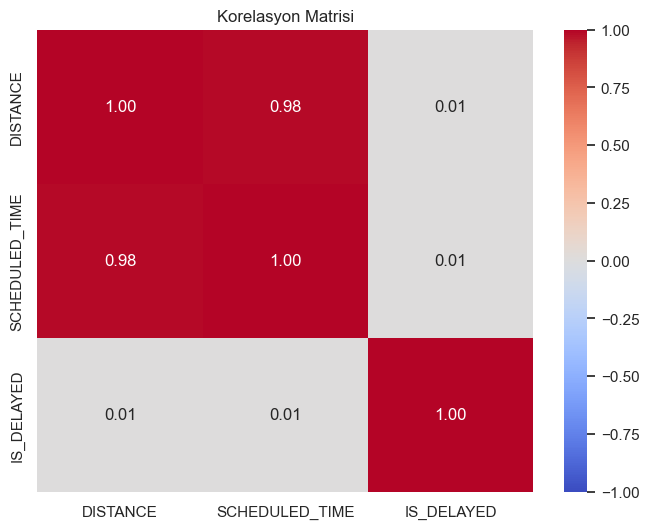

In [28]:
if 'train_df' in locals():
  

    # EDA
    plt.figure(figsize=(8, 5))
    sns.countplot(x='IS_DELAYED', data=train_df)
    plt.title('IS_DELAYED Dağılımı', fontsize=16)
    plt.xlabel('Gecikme Durumu (0 = Gecikmedi, 1 = Gecikti)')
    plt.ylabel('Uçuş Sayısı')
    
    # yüzde hesaplama
    
    total = len(train_df)
    ax = plt.gca()
    for p in ax.patches:
        percentage = f'{(p.get_height() / total * 100):.2f}%'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')
    plt.show()
  


    # Histogram
    
    print(f"\nSayısal Değişkenlerin Dağılımı ('DISTANCE','SCHEDULED_TIME'):")
    
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(train_df['DISTANCE'], kde=True, bins=50)
    plt.title('Uçuş Mesafesi (DISTANCE) Dağılımı')

    plt.subplot(1, 2, 2)
    sns.histplot(train_df['SCHEDULED_TIME'], kde=True, bins=50)
    plt.title('Planlanan Uçuş Süresi (SCHEDULED_TIME) Dağılımı')
    plt.tight_layout()
    plt.show()

    numeric_features = ['DISTANCE', 'SCHEDULED_TIME']
    # Korelasyon
    
    print("\nSayısal Değişkenler ve Hedef Değişken Arasındaki Korelasyon:")
    
    # Korelasyon matrisi
    corr_df = train_df[numeric_features + ['IS_DELAYED']].corr()
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_df, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Korelasyon Matrisi')
    plt.show()
    

else:
    print("Veriler bulunamadı.")

In [29]:
if 'train_df' in locals():
    # x = özellik, y = hedef oluşturma
    
    X_train = train_df.drop('IS_DELAYED', axis=1)
    y_train = train_df['IS_DELAYED']
    
    X_test = test_df.drop('IS_DELAYED', axis=1)
    y_test = test_df['IS_DELAYED']

    # Encoding
    
    X_train_encoded, X_test_encoded = encode_features(X_train, X_test, y_train)
  
    print(f"Eğitime hazır X_train_encoded boyutu: {X_train_encoded.shape}")
    print(f"Teste hazır X_test_encoded boyutu: {X_test_encoded.shape}")
    
 
    
else:
    print("Veriler bulunamadı.")

Encoding işlemleri tamamlandı.
Eğitime hazır X_train_encoded boyutu: (4571137, 26)
Teste hazır X_test_encoded boyutu: (1142871, 26)


1.Base Model:  LOGISTIC REGRESSION - 4 FARKLI SENARYO (MAE, ROC AUC & PR AUC + CONFUSION MATRIX)
 Başlangıç Sütun Sayısı: 26

 1. Senaryo Sadece Dimensionality Reduction -> eğitiliyor...
Tamamlandı! (38.96 sn)
 ROC AUC: %62.93 | PR AUC: %25.62
 F1: %34.70 | Recall: %61.91
 MAE (Hata): 0.4172
-> İşlem Sonrası Kalan Sütun: 10


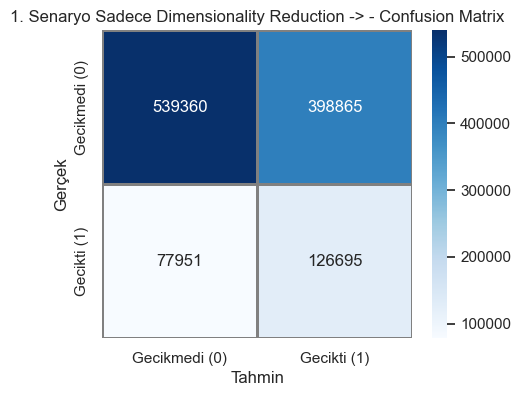

--- 1. Senaryo Sadece Dimensionality Reduction -> Detayları ---
Doğru Negatif (TN) - Gecikmedi, Model bildi: 539360
Yanlış Pozitif (FP) - Gecikmedi, Model 'Gecikecek' dedi (Yanlış Bildi): 398865
Yanlış Negatif (FN) - Gecikti, Model 'Gecikmeyecek' dedi (Kaçırılan): 77951
Doğru Pozitif (TP) - Gecikti, Model bildi: 126695
--------------------------------------------------

 2. Senaryo Sadece Feature Selection -> eğitiliyor...
Tamamlandı! (94.97 sn)
 ROC AUC: %63.48 | PR AUC: %25.96
 F1: %35.08 | Recall: %61.85
 MAE (Hata): 0.4100
-> İşlem Sonrası Kalan Sütun: 15


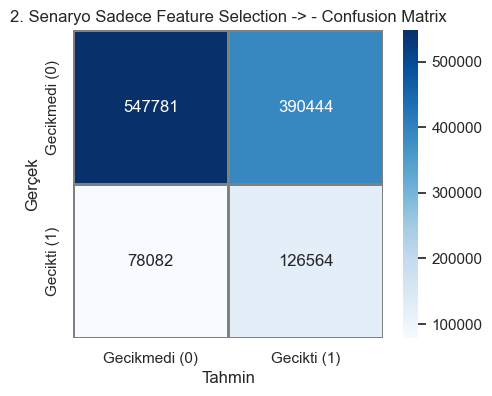

--- 2. Senaryo Sadece Feature Selection -> Detayları ---
Doğru Negatif (TN) - Gecikmedi, Model bildi: 547781
Yanlış Pozitif (FP) - Gecikmedi, Model 'Gecikecek' dedi (Yanlış Bildi): 390444
Yanlış Negatif (FN) - Gecikti, Model 'Gecikmeyecek' dedi (Kaçırılan): 78082
Doğru Pozitif (TP) - Gecikti, Model bildi: 126564
--------------------------------------------------

 3. Senaryo Dimensionality Reduction ve Feature Selection -> eğitiliyor...
Tamamlandı! (87.37 sn)
 ROC AUC: %63.43 | PR AUC: %25.90
 F1: %35.04 | Recall: %61.91
 MAE (Hata): 0.4110
-> İşlem Sonrası Kalan Sütun: 10


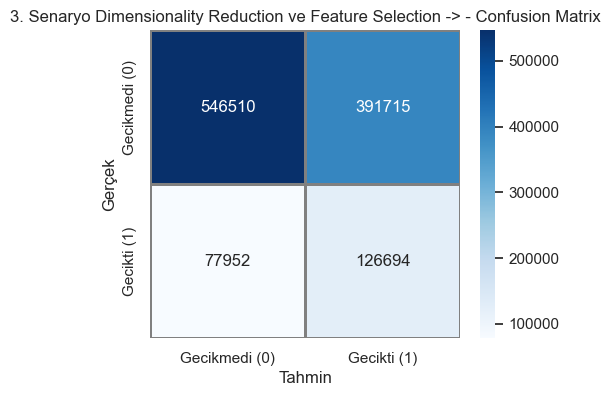

--- 3. Senaryo Dimensionality Reduction ve Feature Selection -> Detayları ---
Doğru Negatif (TN) - Gecikmedi, Model bildi: 546510
Yanlış Pozitif (FP) - Gecikmedi, Model 'Gecikecek' dedi (Yanlış Bildi): 391715
Yanlış Negatif (FN) - Gecikti, Model 'Gecikmeyecek' dedi (Kaçırılan): 77952
Doğru Pozitif (TP) - Gecikti, Model bildi: 126694
--------------------------------------------------

 4. Senaryo Sadece Model -> eğitiliyor...
Tamamlandı! (51.43 sn)
 ROC AUC: %63.57 | PR AUC: %26.07
 F1: %35.12 | Recall: %62.04
 MAE (Hata): 0.4105
-> İşlem Sonrası Kalan Sütun: 26


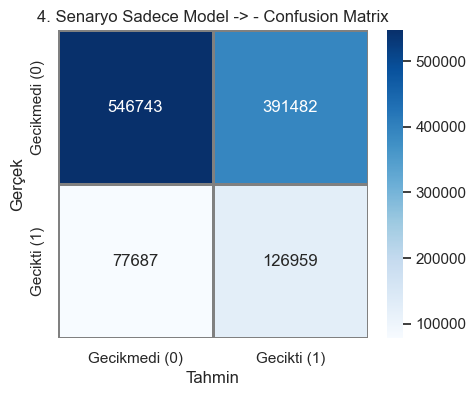

--- 4. Senaryo Sadece Model -> Detayları ---
Doğru Negatif (TN) - Gecikmedi, Model bildi: 546743
Yanlış Pozitif (FP) - Gecikmedi, Model 'Gecikecek' dedi (Yanlış Bildi): 391482
Yanlış Negatif (FN) - Gecikti, Model 'Gecikmeyecek' dedi (Kaçırılan): 77687
Doğru Pozitif (TP) - Gecikti, Model bildi: 126959
--------------------------------------------------


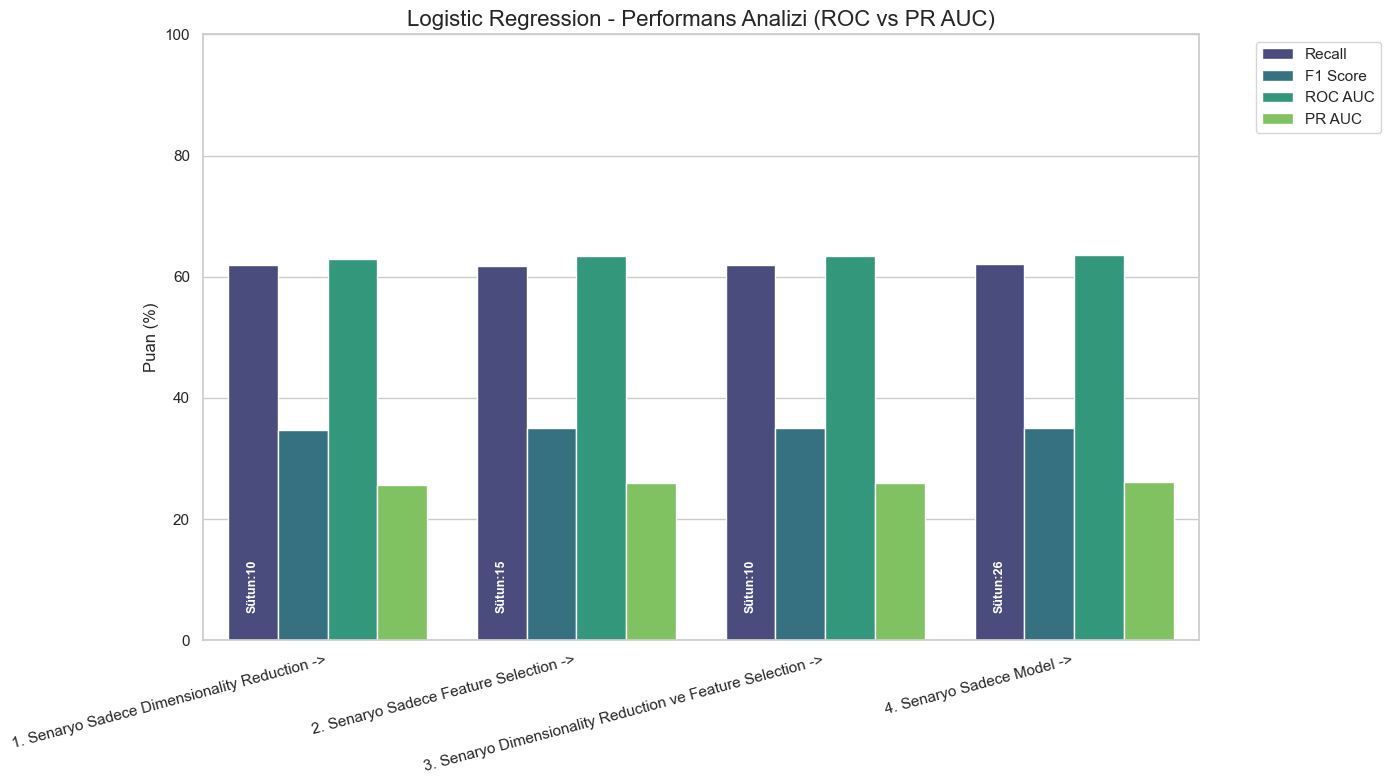


ÖZET TABLO (ROC AUC vs PR AUC)
                                                    Kalan Sütun  Accuracy  \
Senaryo                                                                     
1. Senaryo Sadece Dimensionality Reduction ->                10     58.28   
2. Senaryo Sadece Feature Selection ->                       15     59.00   
3. Senaryo Dimensionality Reduction ve Feature ...           10     58.90   
4. Senaryo Sadece Model ->                                   26     58.95   

                                                    Recall  F1 Score  ROC AUC  \
Senaryo                                                                         
1. Senaryo Sadece Dimensionality Reduction ->        61.91     34.70    62.93   
2. Senaryo Sadece Feature Selection ->               61.85     35.08    63.48   
3. Senaryo Dimensionality Reduction ve Feature ...   61.91     35.04    63.43   
4. Senaryo Sadece Model ->                           62.04     35.12    63.57   

                  

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, mean_absolute_error, average_precision_score, confusion_matrix
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Veriler hafızadaysa başla
if 'X_train_encoded' in locals():
    print("=" * 90)
    print(f"1.Base Model:  LOGISTIC REGRESSION - 4 FARKLI SENARYO (MAE, ROC AUC & PR AUC + CONFUSION MATRIX)")
    print(f" Başlangıç Sütun Sayısı: {X_train_encoded.shape[1]}")
    print("=" * 90)

    sonuclar = []
    orijinal_sutun = X_train_encoded.shape[1]

    # --- Base Model: LogisticRegression
    model = LogisticRegression(solver='saga', class_weight='balanced', max_iter=100, n_jobs=-1, random_state=45)
    
    # --- Feature Selection Tekniği
    linearSVC = SelectFromModel(
        LinearSVC(penalty="l1", dual=False, max_iter=1000, random_state=45), 
        threshold=-np.inf, 
        max_features=15
    )
    #--- Dimensionality Reduction Tekniği
    truncatedSvd= TruncatedSVD(n_components=10, random_state=45)
    scaler = StandardScaler()

    # --- 4 FARKLI SENARYO ---
    senaryolar = {
        "1. Senaryo Sadece Dimensionality Reduction ->": Pipeline([('scaler', scaler),('reduction', truncatedSvd),('model', model)]),
        "2. Senaryo Sadece Feature Selection ->": Pipeline([('scaler', scaler),('selection', linearSVC),('model', model)]),
        "3. Senaryo Dimensionality Reduction ve Feature Selection ->": Pipeline([('scaler', scaler),('selection', linearSVC),('reduction', truncatedSvd),('model', model)]),
        "4. Senaryo Sadece Model ->": Pipeline([('scaler', scaler),('model', model)])
    }

    # --- DÖNGÜ ---
    for isim, pipe in senaryolar.items():
        print(f"\n {isim} eğitiliyor...")
        start = time.time()
        
        try:
            pipe.fit(X_train_encoded, y_train)
            
            # Normal Tahmin (0 veya 1)
            y_pred = pipe.predict(X_test_encoded)
            
            # Olasılık Tahmini 
            y_prob = pipe.predict_proba(X_test_encoded)[:, 1]
            
            sure = time.time() - start
            
            # Metrikler 
            acc = accuracy_score(y_test, y_pred) * 100
            f1 = f1_score(y_test, y_pred, average='binary') * 100
            rec = recall_score(y_test, y_pred, average='binary') * 100
            
            # ROC AUC 
            roc_auc = roc_auc_score(y_test, y_prob) * 100
            
            # PR AUC 
            pr_auc = average_precision_score(y_test, y_prob) * 100
            
            # MAE
            mae = mean_absolute_error(y_test, y_pred) 
            
            print(f"Tamamlandı! ({sure:.2f} sn)")
            
            # --- SÜTUN ANALİZİ ---
            kalan_sutun = orijinal_sutun
            if 'selection' in pipe.named_steps: kalan_sutun = pipe.named_steps['selection'].get_support().sum()
            if 'reduction' in pipe.named_steps: kalan_sutun = pipe.named_steps['reduction'].n_components

            print(f" ROC AUC: %{roc_auc:.2f} | PR AUC: %{pr_auc:.2f}")
            print(f" F1: %{f1:.2f} | Recall: %{rec:.2f}")
            print(f" MAE (Hata): {mae:.4f}")
            print(f"-> İşlem Sonrası Kalan Sütun: {kalan_sutun}")
            
            # --- CONFUSION MATRIX (Çizim ve Yazdırma) ---
            cm = confusion_matrix(y_test, y_pred)
            plt.figure(figsize=(5, 4))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=1, linecolor='gray',
                        xticklabels=['Gecikmedi (0)', 'Gecikti (1)'],
                        yticklabels=['Gecikmedi (0)', 'Gecikti (1)'])
            plt.title(f'{isim} - Confusion Matrix', fontsize=12)
            plt.ylabel('Gerçek')
            plt.xlabel('Tahmin')
            plt.show()
            
            # --- Detaylı Yazdırma ---
            tn, fp, fn, tp = cm.ravel()
            print(f"--- {isim} Detayları ---")
            print(f"Doğru Negatif (TN) - Gecikmedi, Model bildi: {tn}")
            print(f"Yanlış Pozitif (FP) - Gecikmedi, Model 'Gecikecek' dedi (Yanlış Bildi): {fp}")
            print(f"Yanlış Negatif (FN) - Gecikti, Model 'Gecikmeyecek' dedi (Kaçırılan): {fn}")
            print(f"Doğru Pozitif (TP) - Gecikti, Model bildi: {tp}")
            print("-" * 50)
            
            sonuclar.append({
                "Senaryo": isim, 
                "Kalan Sütun": kalan_sutun, 
                "Accuracy": acc, 
                "Recall": rec, 
                "F1 Score": f1,
                "ROC AUC": roc_auc,
                "PR AUC": pr_auc,
                "MAE": mae
            })

        except Exception as e:
            print(f" Hata: {e}")


    if sonuclar:
        df = pd.DataFrame(sonuclar)
        
        # Karşılaştırma Grafiği
        plt.figure(figsize=(14, 8))
        df_melted = df.melt(id_vars="Senaryo", value_vars=["Recall", "F1 Score", "ROC AUC", "PR AUC"], var_name="Metrik", value_name="Puan")
        
        sns.barplot(data=df_melted, x="Senaryo", y="Puan", hue="Metrik", palette="viridis")
        plt.title("Logistic Regression - Performans Analizi (ROC vs PR AUC)", fontsize=16)
        plt.ylabel("Puan (%)")
        plt.xlabel("")
        plt.xticks(rotation=15, ha='right')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') 
        plt.ylim(0, 100) 
        
        for i, p in enumerate(plt.gca().patches):
            if i < len(df): 
                txt = f"Sütun:{df.iloc[i % len(df)]['Kalan Sütun']}"
                plt.gca().text(p.get_x() + p.get_width()/2, 5, txt, ha='center', color='white', fontsize=9, rotation=90, fontweight='bold')

        plt.tight_layout()
        plt.show()
        
        print("\n" + "="*95)
        print("ÖZET TABLO (ROC AUC vs PR AUC)")
        print(df.set_index("Senaryo")[["Kalan Sütun", "Accuracy", "Recall", "F1 Score", "ROC AUC", "PR AUC", "MAE"]].round(2))
        print("="*95)
else:
    print("Hata: Veri bulunamadı.")

 2.Base Model:  DECISION TREE - 4 FARKLI SENARYO (MAE, ROC AUC & PR AUC + CONFUSION MATRIX)
 Feature Selection Tekniği: SelectKBest (ANOVA) | Dimensionality Reduction Tekniği: FastICA
Başlangıç Sütun Sayısı: 26

 1. Senaryo Sadece  Dimensionality Reduction -> eğitiliyor...
Tamamlandı! (142.91 sn)
 ROC AUC: %67.16 | PR AUC: %31.08
 F1: %39.07 | Recall: %60.65
 MAE (Hata): 0.3387
 -> İşlem Sonrası Kalan Sütun: 10
 ACCURACY: %66.13


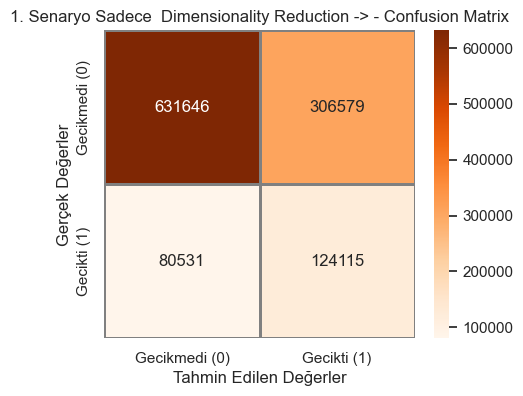

--- 1. Senaryo Sadece  Dimensionality Reduction -> Detayları ---
Doğru Negatif (TN) - Gecikmedi, Model bildi: 631646
Yanlış Pozitif (FP) - Gecikmedi, Model 'Gecikir' dedi: 306579
Yanlış Negatif (FN) - Gecikti, Model 'Gecikmez' dedi: 80531
Doğru Pozitif (TP) - Gecikti, Model bildi: 124115
--------------------------------------------------

 2. Senaryo Sadece  Feature Selection -> eğitiliyor...
Tamamlandı! (15.66 sn)
 ROC AUC: %66.51 | PR AUC: %30.05
 F1: %36.85 | Recall: %64.12
 MAE (Hata): 0.3936
 -> İşlem Sonrası Kalan Sütun: 15
 ACCURACY: %60.64


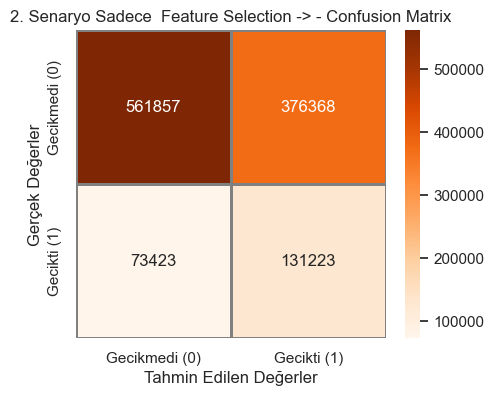

--- 2. Senaryo Sadece  Feature Selection -> Detayları ---
Doğru Negatif (TN) - Gecikmedi, Model bildi: 561857
Yanlış Pozitif (FP) - Gecikmedi, Model 'Gecikir' dedi: 376368
Yanlış Negatif (FN) - Gecikti, Model 'Gecikmez' dedi: 73423
Doğru Pozitif (TP) - Gecikti, Model bildi: 131223
--------------------------------------------------

 3. Senaryo Feature Selection ve Dimensionality Reduction -> eğitiliyor...
Tamamlandı! (43.25 sn)
 ROC AUC: %66.16 | PR AUC: %29.51
 F1: %36.71 | Recall: %64.15
 MAE (Hata): 0.3961
 -> İşlem Sonrası Kalan Sütun: 10
 ACCURACY: %60.39


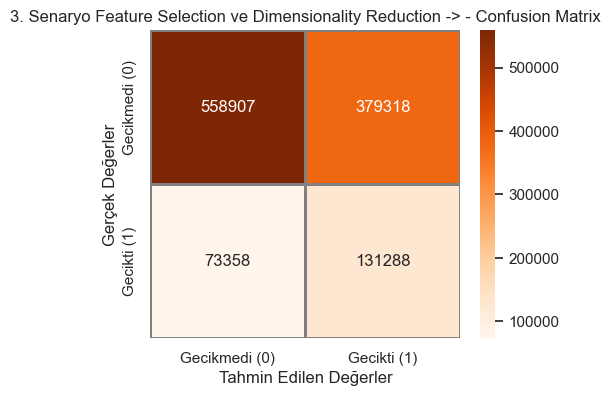

--- 3. Senaryo Feature Selection ve Dimensionality Reduction -> Detayları ---
Doğru Negatif (TN) - Gecikmedi, Model bildi: 558907
Yanlış Pozitif (FP) - Gecikmedi, Model 'Gecikir' dedi: 379318
Yanlış Negatif (FN) - Gecikti, Model 'Gecikmez' dedi: 73358
Doğru Pozitif (TP) - Gecikti, Model bildi: 131288
--------------------------------------------------

 4. Senaryo Sadece Model -> eğitiliyor...
Tamamlandı! (31.82 sn)
 ROC AUC: %68.81 | PR AUC: %34.34
 F1: %39.97 | Recall: %61.57
 MAE (Hata): 0.3311
 -> İşlem Sonrası Kalan Sütun: 26
 ACCURACY: %66.89


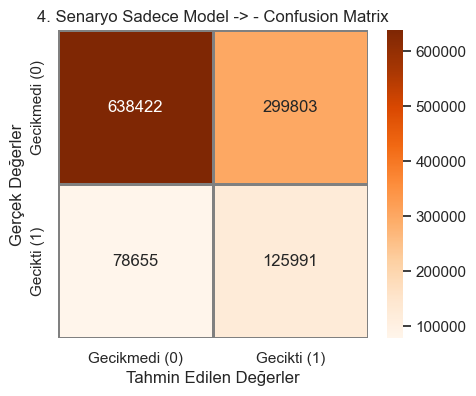

--- 4. Senaryo Sadece Model -> Detayları ---
Doğru Negatif (TN) - Gecikmedi, Model bildi: 638422
Yanlış Pozitif (FP) - Gecikmedi, Model 'Gecikir' dedi: 299803
Yanlış Negatif (FN) - Gecikti, Model 'Gecikmez' dedi: 78655
Doğru Pozitif (TP) - Gecikti, Model bildi: 125991
--------------------------------------------------


In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import FastICA
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, mean_absolute_error, average_precision_score, confusion_matrix
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Veriler hafızadaysa başla
if 'X_train_encoded' in locals():
    print("=" * 90)
    print(f" 2.Base Model:  DECISION TREE - 4 FARKLI SENARYO (MAE, ROC AUC & PR AUC + CONFUSION MATRIX)")
    print(f" Feature Selection Tekniği: SelectKBest (ANOVA) | Dimensionality Reduction Tekniği: FastICA")
    print(f"Başlangıç Sütun Sayısı: {X_train_encoded.shape[1]}")
    print("=" * 90)

    sonuclar = []
    orijinal_sutun = X_train_encoded.shape[1]

    # --- Base model: DecisionTree
    model = DecisionTreeClassifier(max_depth=20, class_weight='balanced', random_state=45)
    #--- Feature Selection Tekniği
    selectKbest = SelectKBest(score_func=f_classif, k=15)
    #--- Dimensionality Reduction Tekniği
    fastIca = FastICA(n_components=10, random_state=42, whiten='unit-variance')
    scaler = RobustScaler()

    # --- 4 SENARYO ---
    senaryolar = {
        "1. Senaryo Sadece  Dimensionality Reduction ->": Pipeline([('scaler', scaler),('reduction', fastIca),('model', model)]),
        "2. Senaryo Sadece  Feature Selection ->": Pipeline([('scaler', scaler),('selection', selectKbest),('model', model)]),
        "3. Senaryo Feature Selection ve Dimensionality Reduction ->": Pipeline([('scaler', scaler),('selection', selectKbest),('reduction', fastIca ),('model', model)]),
        "4. Senaryo Sadece Model ->": Pipeline([('scaler', scaler),('model', model)])
    }

    # --- DÖNGÜ ---
    for isim, pipe in senaryolar.items():
        print(f"\n {isim} eğitiliyor...")
        start = time.time()
        
        try:
            pipe.fit(X_train_encoded, y_train)
            
            # Normal Tahmin (0 ve 1)
            y_pred = pipe.predict(X_test_encoded)
            
            # Olasılık Tahmini 
            y_prob = pipe.predict_proba(X_test_encoded)[:, 1]
            
            sure = time.time() - start
            
            # Metrikler 
            acc = accuracy_score(y_test, y_pred) * 100
            f1 = f1_score(y_test, y_pred, average='binary') * 100
            rec = recall_score(y_test, y_pred, average='binary') * 100
            
            # ROC AUC
            auc = roc_auc_score(y_test, y_prob) * 100
            
            # PR AUC 
            pr_auc = average_precision_score(y_test, y_prob) * 100
            
            # MAE (Hata Oranı)
            mae = mean_absolute_error(y_test, y_pred)

            print(f"Tamamlandı! ({sure:.2f} sn)")
            
            # Sütun Analizi
            kalan_sutun = orijinal_sutun
            if 'selection' in pipe.named_steps: kalan_sutun = pipe.named_steps['selection'].k
            if 'reduction' in pipe.named_steps: kalan_sutun = pipe.named_steps['reduction'].n_components
            
            print(f" ROC AUC: %{auc:.2f} | PR AUC: %{pr_auc:.2f}")
            print(f" F1: %{f1:.2f} | Recall: %{rec:.2f}")
            print(f" MAE (Hata): {mae:.4f}")
            print(f" -> İşlem Sonrası Kalan Sütun: {kalan_sutun}")
            print(f" ACCURACY: %{acc:.2f}")
            
            # --- CONFUSION MATRIX ÇİZİMİ VE ANALİZİ ---
            cm = confusion_matrix(y_test, y_pred)
            plt.figure(figsize=(5, 4))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', linewidths=1, linecolor='gray',
                        xticklabels=['Gecikmedi (0)', 'Gecikti (1)'],
                        yticklabels=['Gecikmedi (0)', 'Gecikti (1)'])
            plt.title(f'{isim} - Confusion Matrix', fontsize=12)
            plt.ylabel('Gerçek Değerler')
            plt.xlabel('Tahmin Edilen Değerler')
            plt.show()

            # Sayısal Detaylar
            tn, fp, fn, tp = cm.ravel()
            print(f"--- {isim} Detayları ---")
            print(f"Doğru Negatif (TN) - Gecikmedi, Model bildi: {tn}")
            print(f"Yanlış Pozitif (FP) - Gecikmedi, Model 'Gecikir' dedi: {fp}")
            print(f"Yanlış Negatif (FN) - Gecikti, Model 'Gecikmez' dedi: {fn}")
            print(f"Doğru Pozitif (TP) - Gecikti, Model bildi: {tp}")
            print("-" * 50)

        except Exception as e:
            print(f"Hata: {e}")
else:
    print("Veri seti bulunamadı.")
        

           İKİ MODEL KARŞILAŞTIRMA: LOGISTIC REGRESSION vE DECISION TREE

Model Eğitiliyor: Logistic Regression...
-> Tamamlandı. Accuracy: %55.94

Model Eğitiliyor: Decision Tree...
-> Tamamlandı. Accuracy: %66.88

------------------------------------------------------------
FİNAL SONUÇ TABLOSU
------------------------------------------------------------
                     Accuracy (%)  AUC Score  F1 Score  MAE (Hata)
Model                                                             
Logistic Regression         55.94      61.56     33.87        0.44
Decision Tree               66.88      68.81     39.97        0.33
------------------------------------------------------------


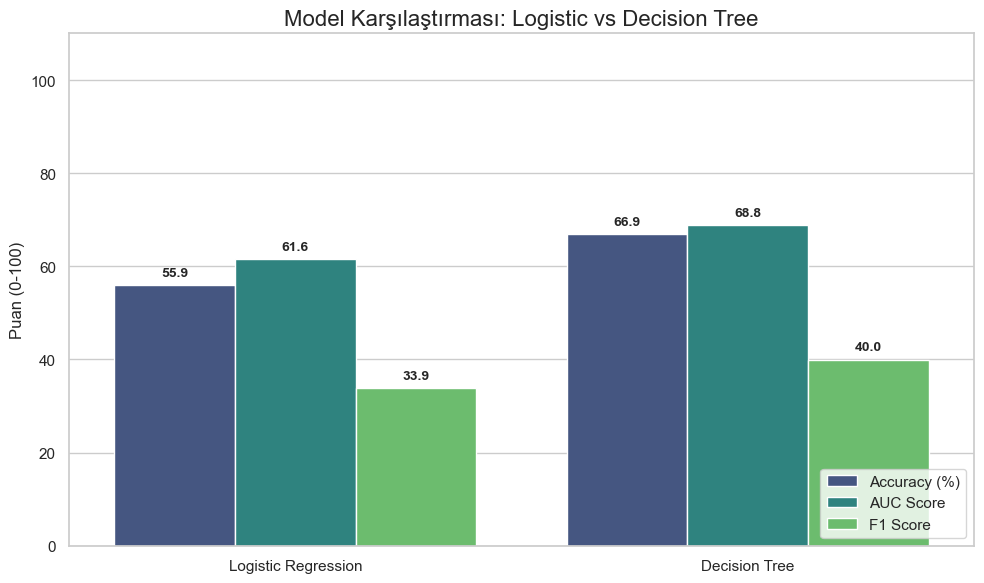

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, mean_absolute_error
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Veriler hafızadaysa çalıştır
if 'X_train_encoded' in locals():
    print("=" * 80)
    print("           İKİ MODEL KARŞILAŞTIRMA: LOGISTIC REGRESSION vE DECISION TREE")
    print("=" * 80)

    # --- 1. Modellerin Tanımlanması ---
    # Her iki modeli de 'balanced' ağırlık ile tanımlandı
    log_model = LogisticRegression(solver='saga', class_weight='balanced', max_iter=100, n_jobs=-1, random_state=45)
    tree_model = DecisionTreeClassifier(max_depth=20, class_weight='balanced', random_state=45)

    models = {
        "Logistic Regression": log_model,
        "Decision Tree": tree_model
    }

    results = []

    # --- 2. Eğitim ve Test Döngüsü ---
    for name, model in models.items():
        print(f"\nModel Eğitiliyor: {name}...")
        try:
            # Eğitim
            model.fit(X_train_encoded, y_train)
            
            # Tahminler
            y_pred = model.predict(X_test_encoded)
            y_prob = model.predict_proba(X_test_encoded)[:, 1] # AUC için pozitif sınıf olasılığı

            # Metrikler
            acc = accuracy_score(y_test, y_pred) * 100
            f1 = f1_score(y_test, y_pred, average='binary') * 100
            auc = roc_auc_score(y_test, y_prob) * 100
            mae = mean_absolute_error(y_test, y_pred) # Hata payı (0-1 arası)

            results.append({
                "Model": name,
                "Accuracy (%)": acc,
                "AUC Score": auc,
                "F1 Score": f1,
                "MAE (Hata)": mae
            })
            print(f"-> Tamamlandı. Accuracy: %{acc:.2f}")

        except Exception as e:
            print(f"Hata ({name}): {e}")

    # --- 3. Sonuçların Görselleştirilmesi ---
    if results:
        df_final = pd.DataFrame(results)
        
        # Tablo Yazdır
        print("\n" + "-"*60)
        print("FİNAL SONUÇ TABLOSU")
        print("-"*60)
        print(df_final.set_index("Model").round(2))
        print("-"*60)

        # Görselleştirme 
        # Veriyi grafik için uygun formata getirme
        df_melted = df_final.melt(id_vars="Model", 
                                  value_vars=["Accuracy (%)", "AUC Score", "F1 Score"], 
                                  var_name="Metrik", 
                                  value_name="Puan")

        plt.figure(figsize=(10, 6))
        ax = sns.barplot(x="Model", y="Puan", hue="Metrik", data=df_melted, palette="viridis")
        
        plt.title("Model Karşılaştırması: Logistic vs Decision Tree", fontsize=16)
        plt.ylabel("Puan (0-100)")
        plt.xlabel("")
        plt.ylim(0, 110) 
        plt.legend(loc='lower right')


        for p in ax.patches:
            if p.get_height() > 0:
                ax.annotate(f'{p.get_height():.1f}', 
                            (p.get_x() + p.get_width() / 2., p.get_height()), 
                            ha = 'center', va = 'center', 
                            xytext = (0, 9), 
                            textcoords = 'offset points',
                            fontsize=10, fontweight='bold')

        plt.tight_layout()
        plt.show()
        
else:
    print("Hata: Eğitim verileri bulunamadı. ")

ROC AUC Skoru: 0.6156 (Genel Ayrım Gücü)
PR AUC Skoru : 0.2436  (Pozitif Sınıf Başarısı )


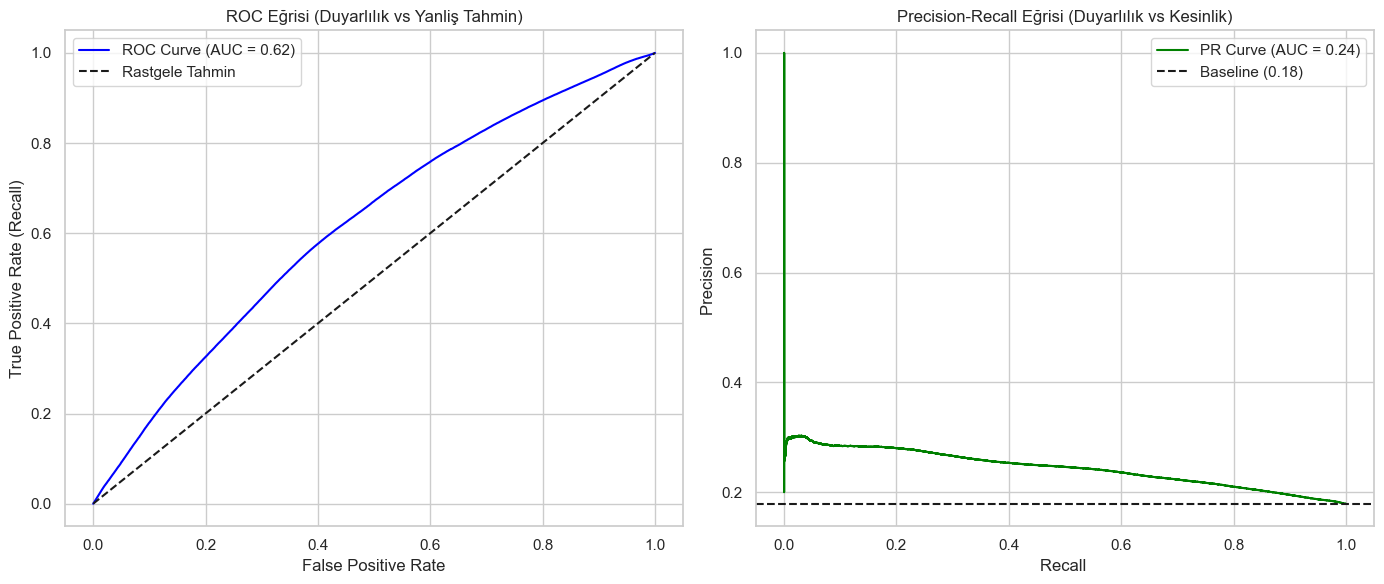

In [40]:
from sklearn.metrics import roc_curve, precision_recall_curve, average_precision_score, roc_auc_score
import matplotlib.pyplot as plt




# 1. Olasılıkları Al
y_probs = log_model.predict_proba(X_test_encoded)[:, 1]

# 2. Skorları Hesapla
roc_auc = roc_auc_score(y_test, y_probs)
pr_auc = average_precision_score(y_test, y_probs)

print(f"ROC AUC Skoru: {roc_auc:.4f} (Genel Ayrım Gücü)")
print(f"PR AUC Skoru : {pr_auc:.4f}  (Pozitif Sınıf Başarısı )")

# 3. Grafikleri Çizdirme
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# --- ROC Eğrisi ---
fpr, tpr, _ = roc_curve(y_test, y_probs)
ax1.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
ax1.plot([0, 1], [0, 1], 'k--', label='Rastgele Tahmin')
ax1.set_title('ROC Eğrisi (Duyarlılık vs Yanliş Tahmin)')
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate (Recall)')
ax1.legend()

# --- Precision-Recall Eğrisi ---
precision, recall, _ = precision_recall_curve(y_test, y_probs)
ax2.plot(recall, precision, label=f'PR Curve (AUC = {pr_auc:.2f})', color='green')
# Baseline (Rastgele bir modelin başarısı = Pozitif oranı)
baseline = len(y_test[y_test==1]) / len(y_test)
ax2.axhline(y=baseline, color='k', linestyle='--', label=f'Baseline ({baseline:.2f})')
ax2.set_title('Precision-Recall Eğrisi (Duyarlılık vs Kesinlik)')
ax2.set_xlabel('Recall ')
ax2.set_ylabel('Precision ')
ax2.legend()

plt.tight_layout()
plt.show()